In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [29]:

df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

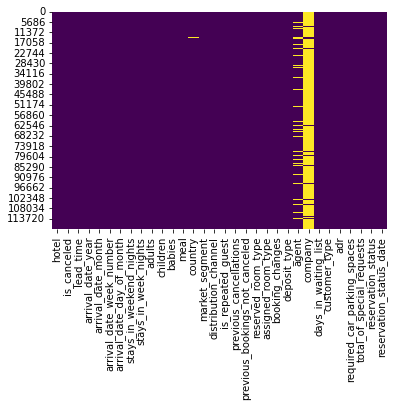

In [32]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [33]:
df["is_canceled"].value_counts()


0    75166
1    44224
Name: is_canceled, dtype: int64

In [34]:
df["is_canceled"].value_counts(normalize=True)*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

In [35]:
df.drop(['company'], axis=1, inplace=True)


In [36]:
df['agent'].fillna(df['agent'].mean(), inplace=True)

<AxesSubplot:>

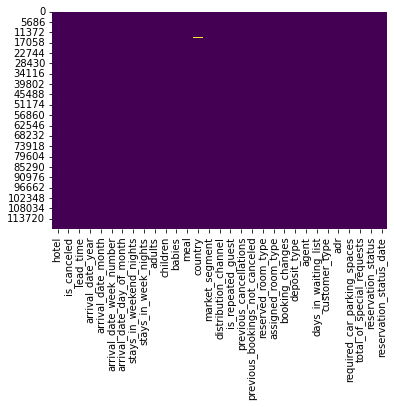

In [37]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [38]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [39]:

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    
        
    return df

label_encoding(df )

df.dropna(inplace=True )

x_dummies = pd.get_dummies(df , columns=['hotel', 'is_canceled', 'adults'])
x_dummies.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,children,babies,meal,...,adults_4,adults_5,adults_6,adults_10,adults_20,adults_26,adults_27,adults_40,adults_50,adults_55
0,342,2015,5,27,1,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,737,2015,5,27,1,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,2015,5,27,1,0,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,2015,5,27,1,0,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,2015,5,27,1,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn import *
from sklearn.model_selection import train_test_split


def logistic_regression(x_train, y_train, x_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    print('Accuracy of Logistic Regression Model: ', logreg.score(x_test, y_test))
    return logreg

logistic_regression = logistic_regression(x_dummies.drop(['is_canceled_0', 'is_canceled_1'], axis=1), df['is_canceled'], x_dummies.drop(['is_canceled_0', 'is_canceled_1'], axis=1), df['is_canceled'])
logistic_regression.coef_



Accuracy of Logistic Regression Model:  0.8081349571976614


/home/dm/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 4.67584081e-03, -1.69532821e-03, -1.15880702e-01,
        -4.41208102e-03,  2.84106056e-02,  2.64300111e-02,
         5.95385796e-02, -8.76790041e-03, -7.03484322e-03,
        -5.27112117e-03,  1.39039266e-02,  2.90257217e-01,
         2.32250915e-01, -2.42623209e-02,  1.11140476e-01,
        -1.29180042e-01, -1.19019300e-01, -5.13486513e-01,
        -1.94126895e-01,  2.05776038e-01,  1.03810007e-03,
        -2.13418367e-03, -1.17076389e-01,  1.41151172e-02,
        -9.35268101e-02, -3.09583086e-01, -8.92263940e-01,
        -1.72709429e-03,  7.45296104e-02, -7.46149921e-02,
        -2.79652362e-04, -3.56087342e-02,  4.47361783e-02,
        -8.48998172e-03, -5.90968652e-04,  1.90476292e-05,
         9.93879154e-06,  9.78323276e-06,  2.17944874e-05,
         4.20900331e-05,  1.68681629e-05,  1.02374357e-05,
         8.84989012e-06,  9.16728415e-06]])

In [53]:
print("Logistic Regression: ", logistic.score(x_test, y_test))


Logistic Regression:  0.7815143646871597


/home/dm/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dm/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

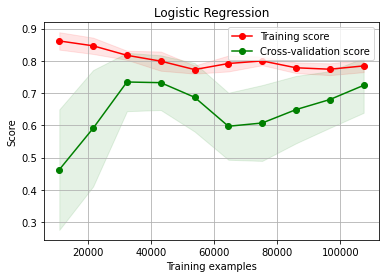

In [71]:
from sklearn.model_selection import learning_curve

def learning_curve_graph(x_train, y_train, x_test, y_test):
    train_sizes = np.linspace(.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(logistic_regression, x_train, y_train, cv=10, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure()
    plt.title("Logistic Regression")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
learning_curve_graph(x_dummies.drop(['is_canceled_0', 'is_canceled_1'], axis=1), df['is_canceled'], x_dummies.drop(['is_canceled_0', 'is_canceled_1'], axis=1), df['is_canceled'])